## Perturb network example
This Jupyter notebook demonstrates methods for perturbing networks.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from complex_network.networks import network_factory, network_perturbator
from complex_network.networks.network_spec import NetworkSpec

Note that a segment has been added to one of the links, shown in red. This segment will later have its refractive index perturbed.

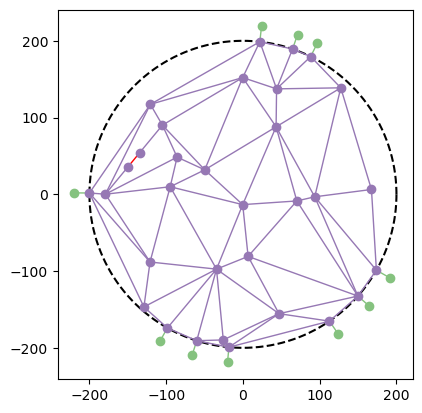

In [2]:
# Generate a random network
np.random.seed(2)
spec = NetworkSpec(
    network_type="delaunay",
    network_shape="circular",
)
network = network_factory.generate_network(spec)
network.add_segment_to_link(15, (0.4, 0.6))

perturb_link_index = 73
# perturb_node_index = 17

network.draw(
    draw_boundary=spec.network_size,
    equal_aspect=True,
    highlight_links=[perturb_link_index],
)

wavelength = 550e-9
k = 2 * np.pi / wavelength

Perturbations are handled by the `NetworkPerturbator` object defined in `complex_network/networks/network_perturbator.py`. This carries several copies of the network to track changes before and after perturbations.

In [3]:
# Alter the refractive index of the specified link
dn = 1e-5
perturbator = network_perturbator.NetworkPerturbator(network)
perturbator.perturb_segment_n(perturb_link_index, dn)

before = perturbator.unperturbed_network.get_link(perturb_link_index).get_S(k)
after = perturbator.perturbed_network.get_link(perturb_link_index).get_S(k)

print("Link propagation matrix before the perturbation:")
print(before)
print()
print("After the perturbation:")
print(after)
print()
print("Change in S matrix element (after/before):")
print(after[0, 1] / before[0, 1])
print()

# Calculate the phase change manually
dphi = dn * k * network.get_link(perturb_link_index).length
print("Manual phase change calculation:")
print(f"k*dn*L = {dphi}")
print(f"exp(i*k*dn*L) = {np.exp(1j * dphi)}")

Link propagation matrix before the perturbation:
[[ 0.        +0.j         -0.29593246+0.95520887j]
 [-0.29593246+0.95520887j  0.        +0.j        ]]

After the perturbation:
[[ 0.        +0.j         -0.68959626-0.72419403j]
 [-0.68959626-0.72419403j  0.        +0.j        ]]

Change in S matrix element (after/before):
(-0.4876826358526351+0.8730209886868849j)

Manual phase change calculation:
k*dn*L = 2666.1507999319574
exp(i*k*dn*L) = (-0.4876826374779694+0.8730209877789488j)
